<a name = "inicio"></a>

***

<div style="font-size: 30px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">Lab 3.3 Estimación modelos de regresión no lineal y logística en Python </div>

<table>
  <tr>
    <td>
<div>
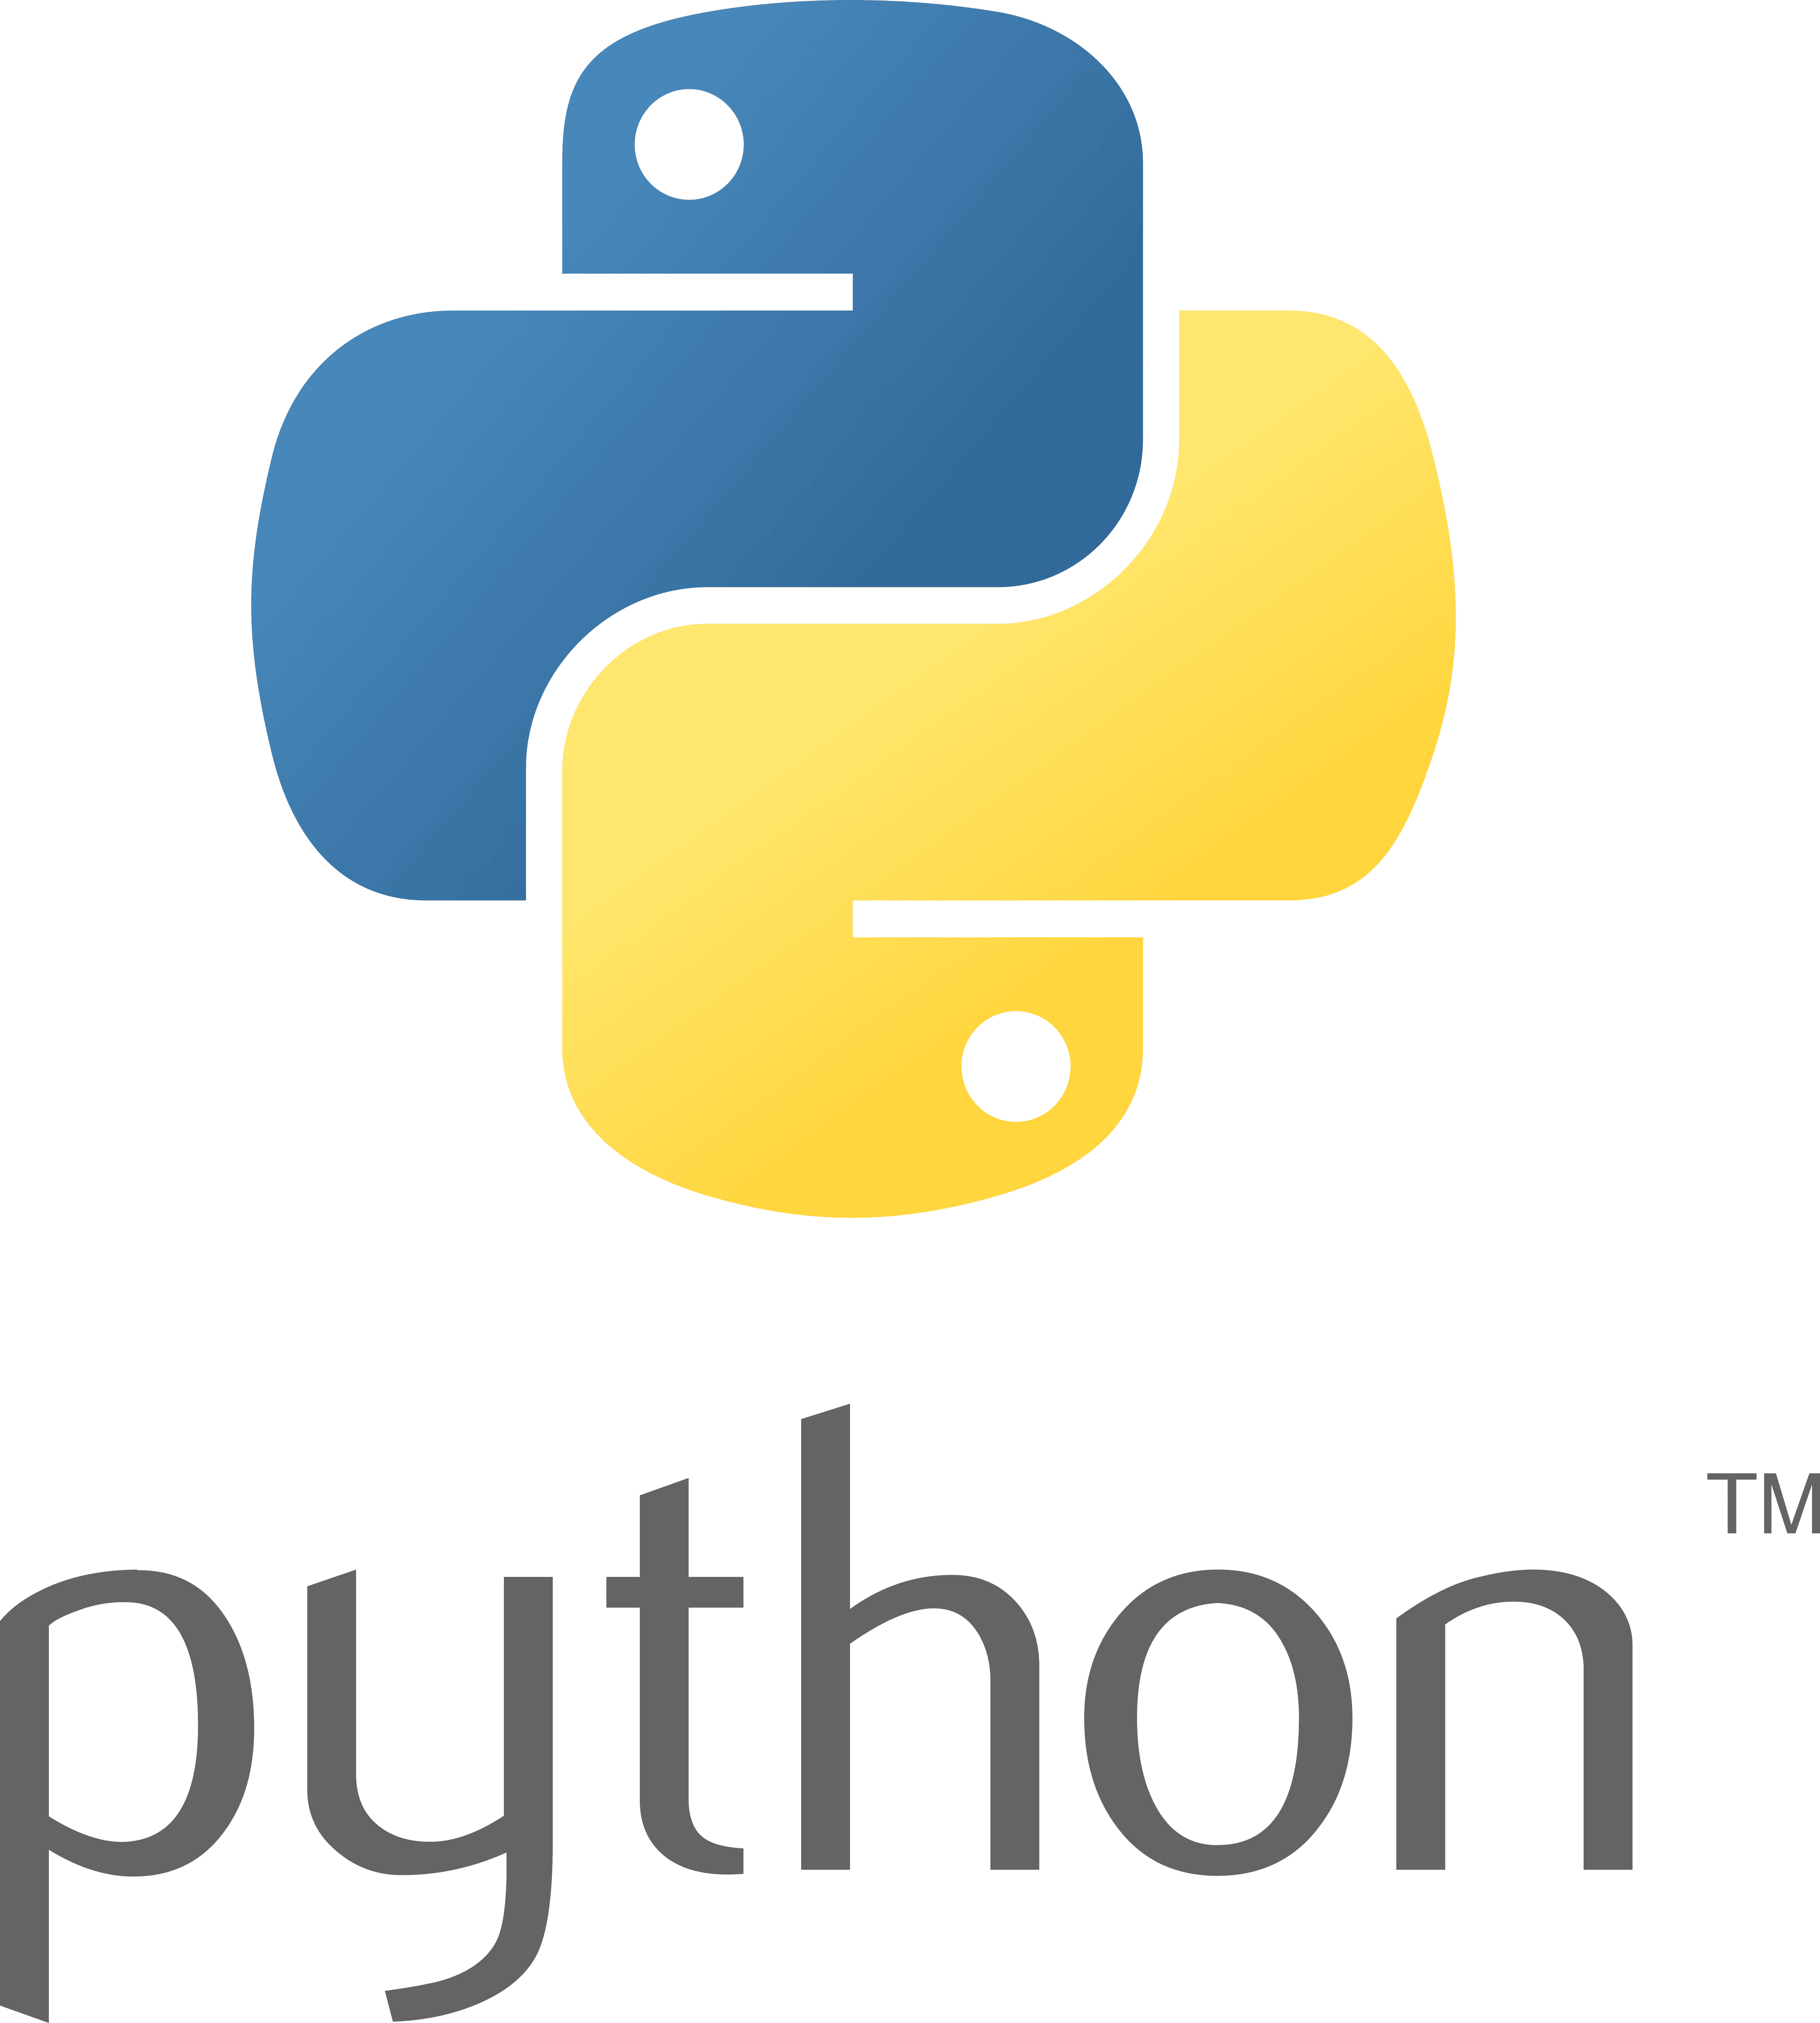
<td>&nbsp;</td><td>&nbsp;</td>
</div>
    </td>
    <td>
<div>
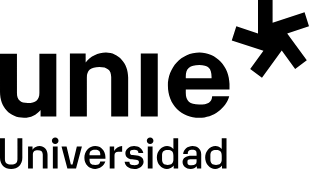
</div>       
</td>
  </tr>
<table>

***

# Instrucciones de la prueba <a id="topic1"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


Este documento corresponde al **Laboratorio 3.3** que tenéis que realizar en grupo abarcando los conceptos vistos en el **Notebook 3.3**. Un alumno en representación del resto de compañeros deberá de entregar este mismo notebook con las respuestas a través de la plataforma **Blackboard** llamando al archivo **Lab3.3_Grupo#**. El profesor publicará la resolución de todos los ejercicios con posterioridad. ¡Mucha suerte y ánimo a tod@s!

**<mark>Nota.-</mark>**<mark><div style="background-color:#F7DC6F"><b>Tened en cuenta que las soluciones que aparecen recogidas en este notebook no muestran (en su totalidad) la respuesta que ustedes tendréis que dar en vuestras resoluciones. Simplemente se aportan los resultados principales de cada uno de los ejercicios propuestos para que podáis utilizarlos como referencias a la hora de autoevaluaros. Recordad que tenéis que completar cada uno de ellos incluyendo comentarios acerca de los resultados obtenidos describiendo con detalle cada una de las celdas tipo código paso a paso lo que estáis haciendo. </b></div>

<mark>(**¡IMPORTANTE!** Recuerda tratar los valores nulos `np.nan`. Puedes hacerlo eliminándolos [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) o sustituyéndolos (si los hubiera), por ejemplo por el valor medio, utilizando el método [`fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html))</mark>

### Ejercicio 1 

Considerar la información de la base de datos `airquality` de la librería $\tt statsmodels$, que consiste en $154$ medidas (de $6$ variables) de calidad del aire en Nueva York en los últimos tiempos. La variable dependiente `Ozone` que es la concentración media de ozono en la atmósfera (en ppb, partes por billón) se quiere explicar a partir de la variable independiente `Temp` que nos indica la temperatura máxima diaria (en grados Fahrenheit). Se os pide lo siguiente. En primer lugar, realizar una exploración inicial de la base de datos. En segundo lugar, estimar los modelos de regresión no lineal que se detallan abajo. En tercer lugar, compararlos gráficamente con el modelo de regresión lineal simple y calcular las métricas de bondad de ajuste para cada uno de los siguientes supuestos:

1. Estimar y comparar dos o tres modelos de regresión polinómicos utilizando diferentes grados.
2. Estimar y comparar dos o tres modelos de regresión step functions utilizando diferentes puntos de corte.
3. Evaluar y validar el mejor modelo de regresión no-lineal estimado entre todos los considerados en los apartados anteriores.

> **Nota**: La base de datos puede cargarse con la siguiente instrucción en Python:
> ```python
> from statsmodels.api import datasets
> import pandas as pd
> 
> airquality = datasets.get_rdataset('airquality').data
> ```

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 01</b></div>

<div style="background-color:#5DADE2"><b>Apartado 0: Exploración inicial de la base de datos</b></div>

In [6]:
from statsmodels.api import datasets
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 



airquality= datasets.get_rdataset('airquality').data 

airquality.info()
print(airquality.columns)
print('shape:', airquality.shape)

airquality_recortado= airquality.dropna()
airquality_recortado.info()

airquality_recortado.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB
Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')
shape: (153, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    111 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     111 non-null    float64
 3   Temp     111 non-null    int64  
 4   Month    111 non-null    int64  
 5   Day      111 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 6.1 

,Ozone,Solar.R,Wind,Temp,Month,Day
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,42.099099,184.801802,9.939640,77.792793,7.216216,15.945946
std,33.275969,91.152302,3.557713,9.529969,1.473434,8.707194
min,1.000000,7.000000,2.300000,57.000000,5.000000,1.000000
25%,18.000000,113.500000,7.400000,71.000000,6.000000,9.000000
50%,31.000000,207.000000,9.700000,79.000000,7.000000,16.000000
75%,62.000000,255.500000,11.500000,84.500000,9.000000,22.500000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


<div style="background-color:#5DADE2"><b>Apartado 1: Estimar y comparar dos o tres modelos de regresión polinómicos utilizando diferentes grados</b></div>

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Función para calcular AIC y BIC
def calculate_aic_bic(model, X, y):
    ols_model = sm.OLS(y, sm.add_constant(X)).fit()
    return ols_model.aic, ols_model.bic, adjusted_r2(ols_model.rsquared, len(y), X.shape[1])
 
#grado 1
x= airquality_recortado[['Temp']]
y= airquality_recortado['Ozone']
modelo= LinearRegression()
modelo.fit(x,y)

print('Regresion lieneal simple:')
print(f'intercepto: {modelo.intercept_}')
print(f'coef temp: {modelo.coef_[0]}')
r2_poly_1= r2_score(y, modelo.predict(x))
aic_1, bic_1,r2adj_1= calculate_aic_bic(modelo,x,y)
MAE_1= mean_absolute_error(y,modelo.predict(x))
MSE_1= mean_squared_error(y,modelo.predict(x))


#grado 2
x= airquality_recortado[['Temp']]
y= airquality_recortado['Ozone']
poly_2= PolynomialFeatures(degree=2,include_bias=False)
x_grado2= poly_2.fit_transform(x)

model_poly_2= LinearRegression()
model_poly_2.fit(x_grado2,y)


print('\npolinomio grado 2:')
print(f'intercepto: {model_poly_2.intercept_}')
print(f'coef temp: {model_poly_2.coef_[0]}',f'coef temp^2: {model_poly_2.coef_[1]}')

r2_poly2= r2_score(y,model_poly_2.predict(x_grado2))
MAE_2= mean_absolute_error(y,model_poly_2.predict(x_grado2))
MSE_2= mean_squared_error(y,model_poly_2.predict(x_grado2))


aic_2,bic_2,r2adj_2= calculate_aic_bic(model_poly_2, x_grado2,y)


# grado 3
poly_3= PolynomialFeatures(degree=3,include_bias=False)
x_grado3= poly_3.fit_transform(x)
model_poly_3 = LinearRegression()
model_poly_3.fit(x_grado3,y)

print('\npolinomio grado 3:')
print(f'intercepto: {model_poly_3.intercept_}')
print(f'coef temp: {model_poly_2.coef_[0]}',f'coef temp^2: {model_poly_3.coef_[1]}',f'coef temp^3: {model_poly_3.coef_[2]}')

aic_3, bic_3, r2adj_3 = calculate_aic_bic(model_poly_3,x_grado3,y)
r2_poly3= r2_score(y,model_poly_3.predict(x_grado3))
MAE_3= mean_absolute_error(y,model_poly_3.predict(x_grado3))
MSE_3= mean_squared_error(y,model_poly_3.predict(x_grado3))




Regresion lieneal simple:
intercepto: -147.6460723805951
coef temp: 2.4391099055293637

polinomio grado 2:
intercepto: 292.9588540579518
coef temp: -9.226803446783242 coef temp^2: 0.07602414289879827

polinomio grado 3:
intercepto: 1300.050696523322
coef temp: -9.226803446783242 coef temp^2: 0.6033777247852276 coef temp^3: -0.002281222892111079


In [56]:
# Tabla de comparación
comparison = pd.DataFrame({
    "R2": [r2_poly_1,r2_poly2,r2_poly3],
    "Coef.R2adj": [r2adj_1, r2adj_2, r2adj_3],
    "AIC": [aic_1, aic_2, aic_3],
    "BIC": [bic_1, bic_2, bic_3],
    'MAE':[MAE_1,MAE_2,MAE_3],
    'MSE': [MSE_1,MSE_2,MSE_3]
    
}, index=["simple", "cuadrático", "cúbico"])

print("Tabla de comparación:")
comparison

Tabla de comparación:


,R2,Coef.R2adj,AIC,BIC,MAE,MSE
simple,0.487960,0.483262,1021.775145,1027.194205,17.264217,561.868808
cuadrático,0.542627,0.534157,1011.242901,1019.371492,15.200573,501.882127
cúbico,0.547910,0.535234,1011.953360,1022.791481,15.183449,496.085255


R\ En este caso, el mejor modelo seria el cuadratico

Podemos observar que ambos modelos no lineales superan al lineal simple, ya que presentan mayores valores de r2 ajustado y menores valores de bic y aic. Sim embargo el modelo cuadratico es la mejor eleccion ya que a pesar de tener un valor levemente menor de r2_adj presenta menores valores de bic y aic, lo que quiere decir que añadir otro parametro cubico hace que estos calculos basados en la suma de cuadrados de los residuos aumenten, lo que significa que el modelo es capaz de explicar en menor medida lo que sucede con la variable respuesta. A pesar de que el cubico tambien presente menores valores de MAE y MSE que el cuadratico, la eleccion sigue suendo el cuadratico ya que esto puede significar que el modelo se esta sobreajustando de mejor manera a los valores actuales, mas no que es mejor para predecir valores futuros cuando ingrese nuevos datos.

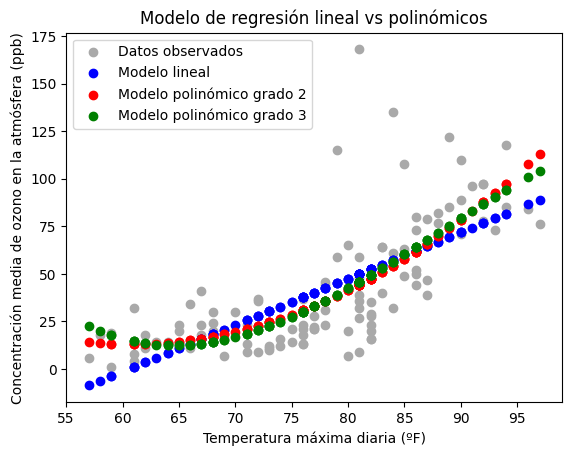

In [60]:
# Representación gráfica del modelo lineal vs cuadrático vs cúbico
plt.scatter(x, y, color='darkgrey', label='Datos observados')
plt.scatter(x, modelo.predict(x), color='blue', label='Modelo lineal')
plt.scatter(x, model_poly_2.predict(x_grado2), color='red', label='Modelo polinómico grado 2')
plt.scatter(x, model_poly_3.predict(x_grado3), color='green', label='Modelo polinómico grado 3')
plt.xlabel("Temperatura máxima diaria (ºF)")
plt.ylabel("Concentración media de ozono en la atmósfera (ppb)")
plt.title("Modelo de regresión lineal vs polinómicos")
plt.legend(loc="upper left")
plt.show()

<div style="background-color:#5DADE2"><b>Apartado 2: Estimar y comparar dos o tres modelos de regresión step functions utilizando diferentes puntos de corte</b></div>

In [120]:
# Regresion lineal simple.
x= airquality_recortado[['Temp']]
y= airquality_recortado['Ozone']
modelo= LinearRegression()
modelo.fit(x,y)

print('Regresion lieneal simple:')
print(f'intercepto: {modelo.intercept_}')
print(f'coef temp: {modelo.coef_[0]}')
r2_poly_1= r2_score(y, modelo.predict(x))
aic_1, bic_1,r2adj_1= calculate_aic_bic(modelo,x,y)
MAE_1= mean_absolute_error(y,modelo.predict(x))
MSE_1= mean_squared_error(y,modelo.predict(x))




#step functions 3 categorias.

rangos_temperatura= pd.cut(airquality_recortado['Temp'], bins= 3, labels=['Baja','Media','Alta'])
rangos_temperatura.value_counts()
dummy_temp= pd.get_dummies(rangos_temperatura,drop_first=True).astype(float)

x_step_1= dummy_temp
y= airquality_recortado['Ozone']
modelo_step_1= LinearRegression()
modelo_step_1.fit(x_step_1,y)

print('\nModelo step function, 3 categorias:')
print('intercepto (temp baja):', modelo_step_1.intercept_)
print('coeficiente temp media:', modelo_step_1.coef_[0])
print('coeficiente temp alta:', modelo_step_1.coef_[1])

r2_step1= r2_score(y, modelo_step_1.predict(x_step_1))
aic_step1,bic_step1,r2adj_step1 = calculate_aic_bic(modelo_step_1,x_step_1,y)
MAE_step_1= mean_absolute_error(y,modelo_step_1.predict(x_step_1))
MSE_step_1= mean_squared_error(y,modelo_step_1.predict(x_step_1))






# step function cuartiles
import numpy as np
cuartiles= np.quantile(airquality_recortado['Temp'],[0,0.25,0.5,0.75,1])
rangos_temperatura_2= pd.cut(airquality_recortado['Temp'], bins=[cuartiles[0],cuartiles[1],cuartiles[2],cuartiles[3],cuartiles[4]])
rangos_temperatura_2.value_counts()
dummy_temp_2= pd.get_dummies(rangos_temperatura_2,drop_first=True).astype(float)
x_step_2= dummy_temp_2

modelo_step_2= LinearRegression()
modelo_step_2.fit(x_step_2,y)

print('\nModelo step function, 4 categorias:')
print('intercepto (Min-Q1):', modelo_step_2.intercept_)
print('coeficiente Q1_Q2:', modelo_step_2.coef_[0])
print('coeficiente Q2-Q3:', modelo_step_2.coef_[1])
print('coeficiente Q3-Max:', modelo_step_2.coef_[1])

r2_step_2= r2_score(y,modelo_step_2.predict(x_step_2))
aic_step2,bic_step2,r2adj_step2 = calculate_aic_bic(modelo_step_2,x_step_2,y)
MAE_step_2= mean_absolute_error(y,modelo_step_2.predict(x_step_2))
MSE_step_2= mean_squared_error(y,modelo_step_2.predict(x_step_2))

Regresion lieneal simple:
intercepto: -147.6460723805951
coef temp: 2.4391099055293637

Modelo step function, 3 categorias:
intercepto (temp baja): 18.038461538461533
coeficiente temp media: 14.572649572649578
coeficiente temp alta: 60.767990074441705

Modelo step function, 4 categorias:
intercepto (Min-Q1): 17.724137931034484
coeficiente Q1_Q2: 10.204433497536952
coeficiente Q2-Q3: 26.968169761273188
coeficiente Q3-Max: 26.968169761273188


In [122]:
# Tabla de comparación
comparison_step = pd.DataFrame({
    "R2": [r2_poly_1,r2_step1,r2_step_2],
    "Coef.R2adj": [r2adj_1, r2adj_step1, r2adj_step2],
    "AIC": [aic_1,aic_step1,aic_step2],
    "BIC": [bic_1,bic_step1,bic_step2],
    'MAE':[MAE_1,MAE_step_1,MAE_step_2],
    'MSE': [MSE_1,MSE_step_1,MSE_step_2]
    
}, index=["lineal simple", "step_1", "step_2"])

print("Tabla de comparación:")
comparison_step

Tabla de comparación:


,R2,Coef.R2adj,AIC,BIC,MAE,MSE
lineal simple,0.487960,0.483262,1021.775145,1027.194205,17.264217,561.868808
step_1,0.506423,0.497283,1019.698840,1027.827430,15.647774,541.609312
step_2,0.503900,0.489991,1022.264656,1033.102777,15.299486,544.377183


R\ en este caso el mejor modelo es el step fucntion con 3 categorias, que podriamos llamar baja, media y alta. Este modelo tiene el mejor r2 y los menores valores de bic y aic.

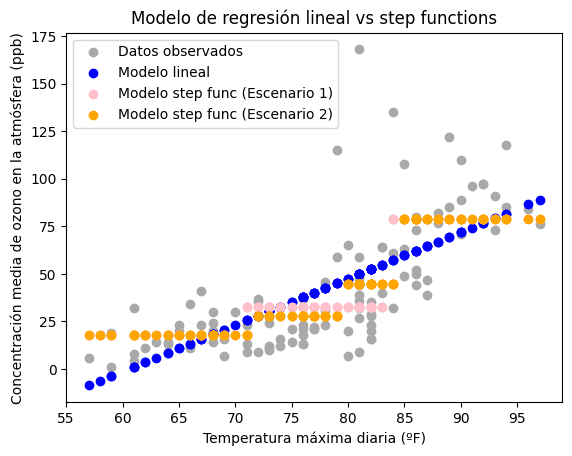

In [123]:
# Representación gráfica del modelo lineal vs step functions
plt.scatter(x, y, color='darkgrey', label='Datos observados')
plt.scatter(x, modelo.predict(x), color='blue', label='Modelo lineal')
plt.scatter(x, modelo_step_1.predict(x_step_1), color='pink', label='Modelo step func (Escenario 1)')
plt.scatter(x, modelo_step_2.predict(x_step_2), color='orange', label='Modelo step func (Escenario 2)')
plt.xlabel("Temperatura máxima diaria (ºF)")
plt.ylabel("Concentración media de ozono en la atmósfera (ppb)")
plt.title("Modelo de regresión lineal vs step functions")
plt.legend(loc="upper left")
plt.show()

<div style="background-color:#5DADE2"><b>Apartado 3: Evaluar y validar el mejor modelo de regresión no-lineal estimado entre todos los considerados en los apartados anteriores</b></div>

In [159]:
comparacion_modelos= pd.concat([comparison, comparison_step.iloc[1:]], axis=0)
comparacion_modelos

,R2,Coef.R2adj,AIC,BIC,MAE,MSE
simple,0.487960,0.483262,1021.775145,1027.194205,17.264217,561.868808
cuadrático,0.542627,0.534157,1011.242901,1019.371492,15.200573,501.882127
cúbico,0.547910,0.535234,1011.953360,1022.791481,15.183449,496.085255
step_1,0.506423,0.497283,1019.698840,1027.827430,15.647774,541.609312
step_2,0.503900,0.489991,1022.264656,1033.102777,15.299486,544.377183


R\ en este caso el mejor modelo sigue siendo el cuadratico o polinimico de grado 2 por las mismas razones expuestas previamente.

### Ejercicio 2

Considerar la información de la base de datos `Breast Cancer Dataset` de la librería `sklearn.datasets` en Python, que contiene información sobre diferentes características celulares asociadas al diagnóstico de cáncer de mama en $569$ pacientes pertenecientes a un estudio realizado en el Hospital Clínico San Carlos (Madrid) el pasado año. Explicar la probabilidad de la variable dependiente binaria `diagnosis` de si el tumor es maligno ($1$) o benigno ($0$), en función del radio promedio del tumor `mean radius`. Realizar los siguientes apartados:

1. Exploración inicial de la base de datos 
2. Estimación de un modelo de regresión logístico simple entre las variables seleccionadas
3. Interpretación de las salidas del modelo de regresión logístico simple estimado

> **Nota**: La base de datos puede cargarse con la siguiente instrucción en Python:
> ```python
> from sklearn.datasets import load_breast_cancer
> import pandas as pd
> 
> data = load_breast_cancer()
> cancer_df = pd.DataFrame(data.data, columns=data.feature_names)
> cancer_df['diagnosis'] = data.target
> ```

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Exploración inicial de la base de datos </b></div>

In [39]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
cancer_df = pd.DataFrame(data.data, columns=data.feature_names)
cancer_df['diagnosis'] = data.target

cancer_df.info()
print('\nshape: ', cancer_df.shape)
print('\n variables: ', cancer_df.columns)

cancer_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


R\ Se pueden observar que no se tienen valores nulos. se tienen 569 registros, cada uno con 31 variables distintas las cuales podemos observar.

<div style="background-color:#5DADE2"><b>Apartado 2: Estimación de un modelo de regresión logístico simple entre las variables seleccionadas</b></div>

In [55]:
cancer_df_recortado= cancer_df[['mean radius', 'diagnosis']]
cancer_df_recortado

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Supongamos un dataframe DF con columnas 'X1' y 'Y'
X = cancer_df_recortado[['mean radius']] # Variable independiente
y = cancer_df_recortado['diagnosis']     # Variable dependiente dicotómica

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos si las clases están balanceadas o no en ambos conjuntos (train y test)
print("Balanceo en training: ", y_train.value_counts(normalize=True))
print("\nBalanceo en test: ", y_test.value_counts(normalize=True))

# Creamos el modelo de regresión logística
model = LogisticRegression()

# Ajustamos el modelo a los datos de entrenamiento
model.fit(X_train, y_train)


print(f'\nintercepto Bo: {model.intercept_}')
print(f'coeficiente B1: {model.coef_}')


Balanceo en training:  diagnosis
1    0.628571
0    0.371429
Name: proportion, dtype: float64

Balanceo en test:  diagnosis
1    0.622807
0    0.377193
Name: proportion, dtype: float64

intercepto Bo: [14.03968131]
coeficiente B1: [[-0.94882873]]


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Realizamos predicciones
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
FP = cm[0, 1]  # False Positives
TN = cm[0, 0]  # True Negatives
FN = cm[1, 0]  # False Negatives
print("Matriz de Confusión: \n", cm)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = TN / (TN + FP)
F1 = f1_score(y_test, y_pred)

# Imprimir resultados
print("\nMétricas de evaluación:")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"Especificidad (Specificity): {specificity:.2f}")
print(f"F1-Score: {F1:.2f}")


Matriz de Confusión: 
 [[35  8]
 [ 0 71]]

Métricas de evaluación:
Exactitud (Accuracy): 0.93
Precisión (Precision): 0.90
Sensibilidad (Recall): 1.00
Especificidad (Specificity): 0.81
F1-Score: 0.95


<div style="background-color:#5DADE2"><b>Apartado 3: Interpretación de las salidas del modelo de regresión logístico simple estimado</b></div>

EL modelo tiene una exactitud del 93% lo cual es muy alto para predecir en terminos generales si tiene o no cancer el paciente. El modelo tiene una precision del 90% y una sensibilidad del 100%, lo que quiere decir que identifica siempre de manera correcta todos los casos en los que el tumor es maligno como maligno pero se equivoca en algunos casos donde no lo es y lo cataloga como un si lo es. Sin embargo una precision del 90% es buena. Al modelo le cuesta mas identificar los que no son malignos y catalogarlos como tal, esto se explica en parte por el desbalanceo de las clases, em este caso tenemos un 80% en esta metrica de especificidad que evalua la tasa de cuantos cataloga el modelo como no malignos sobre los que realmente lo son, observamos que comete ese error de catalogar como malignos unos tumores que realmente no lo son.

### Ejercicio 3

El dataframe `Boston` contiene información de propiedades inmobiliarias de la ciudad de Boston. Cada propiedad está caracterizada por 13 variables que indican las características de la misma, así como por la variable `MEDV` que representa una estimación del valor de la propiedad en miles de dólares. Considerando la variable dependiente `MEDV` en función de la variable independiente `CRIM`, que representan la tasa de crimen per capita de los distritos a los que pertenece cada una de las viviendas, se os pide lo siguiente. En primer lugar, realizar una exploración inicial de la base de datos. En segundo lugar, estimar los modelos de regresión no lineal que se detallan abajo. En tercer lugar, compararlos gráficamente con el modelo de regresión lineal simple y calcular las métricas de bondad de ajuste para cada uno de los siguientes casos:

1. Estimar y comparar dos o tres modelos de regresión polinómicos utilizando diferentes grados.
2. Estimar y comparar dos o tres modelos de regresión step functions utilizando diferentes puntos de corte.
3. Evaluar y validar el mejor modelo de regresión no-lineal estimado entre todos los considerados en los apartados anteriores.

> **Nota**: La base de datos puede cargarse con la siguiente instrucción en Python:
> ```python
> import pandas as pd
> 
> boston_df = pd.read_csv('boston.csv', sep=',', header=0)
> ```

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 03</b></div>

<div style="background-color:#5DADE2"><b>Apartado 0: Exploración inicial de la base de datos</b></div>

In [6]:
import pandas as pd

boston_df = pd.read_csv('boston.csv', sep=',', header=0)
boston_df

boston_df.info()
print(f'\nshape: {boston_df.shape}')
print(f'\nvariables: {boston_df.columns}')

print(boston_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB

shape: (506, 14)

variables: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
             CRIM          ZN       INDUS        CHAS         NOX        

R\ podemos ver que no hay nulos, podemos ver las dimensiones y por ultimo las principales estadisticas descriptivas para las variables

<div style="background-color:#5DADE2"><b> Apartado 1: Estimar y comparar dos o tres modelos de regresión polinómicos utilizando diferentes grados</b></div>

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm


def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Función para calcular AIC y BIC
def calculate_aic_bic(model, X, y):
    ols_model = sm.OLS(y, sm.add_constant(X)).fit()
    return ols_model.aic, ols_model.bic, adjusted_r2(ols_model.rsquared, len(y), X.shape[1])
    
y= boston_df['MEDV']
x= boston_df[['CRIM']]
modelo_lineal= LinearRegression()
modelo_lineal.fit(x,y)
r2_1= r2_score(y,modelo_lineal.predict(x))
aic_1,bic_1,r2adj_1 = calculate_aic_bic(modelo_lineal,x,y)
MAE_1= mean_absolute_error(y,modelo_lineal.predict(x))


# Modelo cuadrático
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly.fit_transform(x)
model_2 = LinearRegression()
model_2.fit(X_poly_2, y)
r2_2= r2_score(y,model_2.predict(X_poly_2))
aic_2,bic_2,r2adj_2 = calculate_aic_bic(model_2,X_poly_2,y)
MAE_2= mean_absolute_error(y,model_2.predict(X_poly_2))

# Modelo cubico
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = poly.fit_transform(x)
model_3 = LinearRegression()
model_3.fit(X_poly_3, y)
r2_3= r2_score(y,model_3.predict(X_poly_3))
aic_3,bic_3,r2adj_3 = calculate_aic_bic(model_3,X_poly_3,y)
MAE_3= mean_absolute_error(y,model_3.predict(X_poly_3))

# Tabla de comparación
comparison = pd.DataFrame({
    "R2": [r2_1, r2_2, r2_3],
    "Coef.R2adj": [r2adj_1, r2adj_2, r2adj_3],
    "AIC": [aic_1, aic_2, aic_3],
    "BIC": [bic_1, bic_2, bic_3],
    'MAE': [MAE_1,MAE_2,MAE_3]
}, index=["lineal_simple", "cuadrático", "cúbico"])


comparison

,R2,Coef.R2adj,AIC,BIC,MAE
lineal_simple,0.150780,0.149096,3601.780731,3610.233804,6.135297
cuadrático,0.209873,0.206732,3567.285858,3579.965468,5.876861
cúbico,0.217705,0.213030,3564.245378,3581.151525,5.819617


R\ el mejor modelo seria el cubico ya aumenta el r2 ajustado y disminuye el AIC, el BIC aumenta levemente, por lo cual añadimos otra metrica en este caso el MAE que tbn se basa en la suma de cuadrados de los residuos y esta nos da un valor que es menor para el modelo cubico con respecto a los otros dos, con lo cual nos dice qie el modelo en promedio esta menos alejado del pronostico que los otros, y explica en mayor medida el comportamiento de la vble respuesta debido a su mejor r2 ajustado.

<div style="background-color:#5DADE2"><b>Apartado 2: Estimar y comparar dos o tres modelos de regresión step functions utilizando diferentes puntos de corte</b></div>

In [28]:
boston_df['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [34]:
#step 1, tres categorias
y= boston_df['MEDV']
rangos_1= pd.cut(boston_df['CRIM'],  bins=3, labels=['Baja', 'Media', 'Alta'])

X_step1 = pd.get_dummies(rangos_1, drop_first=True).astype(float)

model_step1 = LinearRegression()
model_step1.fit(X_step1, y)
y_pred_step1 = model_step1.predict(X_step1)

r2_2= r2_score(y,y_pred_step1)
aic_2,bic_2,r2adj_2 = calculate_aic_bic(model_step1,X_step1,y)
MAE_2= mean_absolute_error(y,y_pred_step1)


# step 2, 4 categorias 
y= boston_df['MEDV']
rangos_2= pd.cut(boston_df['CRIM'],  bins= [ 0.006320,0.082045,0.256510, 3.677083,  88.976200])

X_step2 = pd.get_dummies(rangos_2, drop_first=True).astype(float)

model_step2 = LinearRegression()
model_step2.fit(X_step2, y)
y_pred_step2 = model_step2.predict(X_step2)


r2_3= r2_score(y,y_pred_step2)
aic_3,bic_3,r2adj_3 = calculate_aic_bic(model_step2,X_step2,y)
MAE_3= mean_absolute_error(y,y_pred_step2)

# Tabla de comparación
comparison_2 = pd.DataFrame({
    "R2": [r2_1, r2_2, r2_3],
    "Coef.R2adj": [r2adj_1, r2adj_2, r2adj_3],
    "AIC": [aic_1, aic_2, aic_3],
    "BIC": [bic_1, bic_2, bic_3],
    'MAE': [MAE_1,MAE_2,MAE_3]
}, index=["lineal_simple", "step_1", 'step2'])


comparison_2


,R2,Coef.R2adj,AIC,BIC,MAE
lineal_simple,0.150780,0.149096,3601.780731,3610.233804,6.135297
step_1,0.035821,0.031987,3668.022105,3680.701715,6.509874
step2,0.197603,0.192808,3577.083342,3593.989489,5.914128


R\ el mejor es el step_2 con 4 categorias y 5 puntos de corte teniendo en cuenta los cortes en [MIN, Q1, Q2,Q3, MAX]. se tiene el mejor r2 adj menor bic y aic.

<div style="background-color:#5DADE2"><b>Apartado 3: Evaluar y validar el mejor modelo de regresión no-lineal estimado entre todos los considerados en los apartados anteriores</b></div>

In [35]:
comparacion_total = pd.concat([comparison,comparison_2[1:]], axis=0)
comparacion_total

,R2,Coef.R2adj,AIC,BIC,MAE
lineal_simple,0.150780,0.149096,3601.780731,3610.233804,6.135297
cuadrático,0.209873,0.206732,3567.285858,3579.965468,5.876861
cúbico,0.217705,0.213030,3564.245378,3581.151525,5.819617
step_1,0.035821,0.031987,3668.022105,3680.701715,6.509874
step2,0.197603,0.192808,3577.083342,3593.989489,5.914128


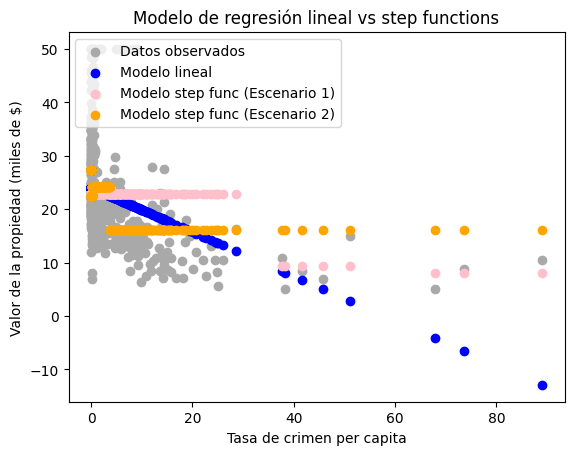

In [38]:
# Representación gráfica del modelo lineal vs step functions
import matplotlib.pyplot as plt
plt.scatter(x, y, color='darkgrey', label='Datos observados')
plt.scatter(x, modelo_lineal.predict(x), color='blue', label='Modelo lineal')
plt.scatter(x, y_pred_step1, color='pink', label='Modelo step func (Escenario 1)')
plt.scatter(x, y_pred_step2, color='orange', label='Modelo step func (Escenario 2)')
plt.xlabel("Tasa de crimen per capita")
plt.ylabel("Valor de la propiedad (miles de $)")
plt.title("Modelo de regresión lineal vs step functions")
plt.legend(loc="upper left")
plt.show()

R el mejor es el cubico polinomico, porque ninguno de steps le supera

### Ejercicio 4

Utilizando el conjunto de datos `titanic_train` de la libería `seaborn` estamos interesados en explicar a través de un modelo de regresión logística la probabilidad que una persona que viajaba a bordo del Titanic sobreviviera ($1$) o no ($0$) en función de la edad que tenían cada uno de los $891$ pasajeros de los $2224$ que embarcaron en el transatlántico británico RMS Titanic. La variable dependiente binaria sería `survived` y la variable independiente `age`. Realizar los siguientes apartados:

1. Exploración inicial de la base de datos 
2. Estimación de un modelo de regresión logístico simple entre las variables seleccionadas
3. Interpretación de las salidas del modelo de regresión logístico simple estimado

> **Nota**: La base de datos puede cargarse con la siguiente instrucción en Python:
> ```python
> import seaborn as sns
> 
> titanic_train = sns.load_dataset('titanic')
> ```

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 04</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Exploración inicial de la base de datos</b></div>

In [1]:
# Importamos dependencias necesarias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
df_titanic= sns.load_dataset('titanic')
df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# revisamos si hay nulos y la forma del dataframe
df_titanic.info()
df_titanic.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


(891, 15)

In [10]:
# Seleccionamos las 2 variables que nos interesan
df_titanic_recortado= df_titanic[['age','survived']]
df_titanic_recortado.head(5)

,age,survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


Teniendo en un dataframe aparte las variables sobre las que evaluaremos el modelo de regresión logistica, nos damos cuenta de que se tienen registros nulos en la columna edad, por lo cual debemos tratar o eliminar estos registros para que no afecten el modelo. En este caso sacaremos del modelo estos registros para quedarnos unicamente con los datos registrados de las personas que sabemos su edad y si sobrevivieron o no.

In [42]:
# registros nulos en columna edad
print(df_titanic_recortado.isnull().sum())
df_titanic_recortado[(df_titanic_recortado['age'].isnull())]

age         177
survived      0
dtype: int64


,age,survived
5,NaN,0
17,NaN,1
19,NaN,1
26,NaN,0
28,NaN,1
...,...,...
859,NaN,0
863,NaN,0
868,NaN,0
878,NaN,0


In [45]:
# Sacamos los nulos del estudio y observamos que tenemos 714 registros ahora, los correspondientes al numero de edades registradas que teniamos al inicio
df_titanic_recortado = df_titanic_recortado.dropna()

print(df_titanic_recortado.isnull().sum())
df_titanic_recortado.shape


age         0
survived    0
dtype: int64


(714, 2)

In [46]:
# Comprobamos si las clases están balanceadas. Obtenemos un 60-40 aproximadamente 
df_titanic_recortado["survived"].value_counts(normalize=True)

survived
0    0.593838
1    0.406162
Name: proportion, dtype: float64

In [47]:
# Realizamos un análisis exploratorio de las variables utilizadas
df_titanic_recortado.describe()

,age,survived
count,714.000000,714.000000
mean,29.699118,0.406162
std,14.526497,0.491460
min,0.420000,0.000000
25%,20.125000,0.000000
50%,28.000000,0.000000
75%,38.000000,1.000000
max,80.000000,1.000000


<div style="background-color:#5DADE2"><b>Apartado 2: Estimación de un modelo de regresión logístico simple entre las variables seleccionadas</b></div>

In [48]:
# Definimos las variables dependiente e independiente
X = df_titanic_recortado[["age"]]  # Variable independiente (edad)
y = df_titanic_recortado["survived"]   # Variable dependiente (sobrevivio)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=42)

# Mostramos si las clases están balanceadas o no en ambos conjuntos (train y test)
print("Balanceo en training: ", y_train.value_counts(normalize=True))
print("\nBalanceo en test: ", y_test.value_counts(normalize=True))

# Estimamos el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Coeficientes del modelo
intercepto = logistic_model.intercept_  # β0
coeficiente_radius = logistic_model.coef_  # β1

print(f"\nIntercepto (β0): {intercepto}")
print(f"Coeficiente para Mean Radius (β1): {coeficiente_radius}")

Balanceo en training:  survived
0    0.590193
1    0.409807
Name: proportion, dtype: float64

Balanceo en test:  survived
0    0.608392
1    0.391608
Name: proportion, dtype: float64

Intercepto (β0): [0.17148014]
Coeficiente para Mean Radius (β1): [[-0.01809087]]


**<u>Interpretación resultados</u>.-** El modelo de regresión logística estimado sería el siguiente:

\begin{align*}
P\left ( Survived \right ) = \frac{1}{1+e^-{\left ( 0.17148 -0.01809 * Age \right )}}
\end{align*}

donde $P\left ( Survived \right )$ es la probabilidad de si una persona que viajaba a bordo del Titanic sobrevivió o no, $e$ es la función exponencial y el resto de coeficientes ($\beta_0$, $\beta_1$) NO tienen una interpretación directa como en el caso de los modelos de regresión lineal y no-lineal.

<div style="background-color:#5DADE2"><b>Apartado 3: Interpretación de las salidas del modelo de regresión logístico simple estimado</b></div>

Cuando queremos evaluar el desempeño de un **modelo de clasificación**, como en el caso de la regresión logística, podemos utilizar una variedad de métricas ampliamente aceptadas que miden diferentes aspectos de su capacidad para predecir correctamente las clases 

Con el entranamiento del modelo con el set de datos de training correspondiente al 80% de registros, pasamos a probar la capacidad predictiva sobre el 20% restante


In [50]:
y_pred = logistic_model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [59]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
FP = cm[0, 1]  # False Positives
TN = cm[0, 0]  # True Negatives
FN = cm[1, 0]  # False Negatives
print("Matriz de Confusión: \n", cm)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = TN / (TN + FP)
F1 = f1_score(y_test, y_pred)

# Imprimir resultados
print("\nMétricas de evaluación:")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"Especificidad (Specificity): {specificity:.2f}")
print(f"F1-Score: {F1:.2f}")

Matriz de Confusión: 
 [[80  7]
 [50  6]]

Métricas de evaluación:
Exactitud (Accuracy): 0.60
Precisión (Precision): 0.46
Sensibilidad (Recall): 0.11
Especificidad (Specificity): 0.92
F1-Score: 0.17


R\ Basandonos unicamente en la edad como unica variable para predecir si un pasajero sobrevivio o no, resulta no brindar el mejor poder predictivo posible. Obtenemos un modelo con un **F1_score de 0.17**. Vemos que en **Accuracy** el modelo acierta en un **60%** en clasificar correctamente a un pasajero dentro de las categorias sobrevivio o no, lo cual tiene mucho margen de mejora. 

Lo principal que podemos analizar que sucede con el modelo, es que es relatvamete bueno para predecir los casos en los que los pasajeros no sobrevivieron, pero le cuesta identificar los que si. Esto lo podemos analizar con base a la **Especificidad**, que tiene el modelo de **0.92**, que basicamente nos dice que tan acertado es el modelo es identificar los negativos reales, es decir los pasajeros que realmente no sobrevivieron. Sin embargo si miramos que tan bueno es el modelo cada que dice que si sobrevive tenemos un **0.46 en Precisión** y aun peor si nos fijamos en que tan bien es capaz de identificar los que si sobreviven del total de personas que realmente sobrevivieron obtenemos una **Sensibilidad de 0.11**. 

Es decir el modelo esta fallando en identificar los valores positivos, tenemos **50 falsos negativos**, el modelo es poco confiable debido a esto. Para mejorar el modelo podriamos incluir mas variables al estudio.

In [79]:

from sklearn.preprocessing import StandardScaler


titanic = sns.load_dataset('titanic')

# Seleccionamos variables de interés y eliminar valores nulos
titanic_filtered = titanic[['survived', 'age', 'sex', 'pclass', 'fare', 'embarked']].dropna()

# Convertir variables categóricas en numéricas
titanic_filtered['sex'] = titanic_filtered['sex'].map({'male': 0, 'female': 1})
titanic_filtered = pd.get_dummies(titanic_filtered, columns=['pclass', 'embarked'], drop_first=True)

# Definir variables predictoras (X) y la variable objetivo (y)
X = titanic_filtered.drop(columns=['survived'])
y = titanic_filtered['survived']

# Estandarizar variables numéricas teniendo en cuenta su media y desv estandar para no influenciar el modelo por variables que sean de mayor magnitud.
scaler = StandardScaler()
X[['age', 'fare']] = scaler.fit_transform(X[['age', 'fare']])

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Mostramos si las clases están balanceadas o no en ambos conjuntos (train y test)
print("Balanceo en training: ", y_train.value_counts(normalize=True))
print("\nBalanceo en test: ", y_test.value_counts(normalize=True))


Balanceo en training:  survived
0    0.595782
1    0.404218
Name: proportion, dtype: float64

Balanceo en test:  survived
0    0.594406
1    0.405594
Name: proportion, dtype: float64


In [80]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1 (supervivencia)

# matriz de confusión
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
FP = cm[0, 1]  # False Positives
TN = cm[0, 0]  # True Negatives
FN = cm[1, 0]  # False Negatives
print("Matriz de Confusión: \n", cm)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = TN / (TN + FP)
F1 = f1_score(y_test, y_pred)

# Imprimir resultados
print("\nMétricas de evaluación:")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"Especificidad (Specificity): {specificity:.2f}")
print(f"F1-Score: {F1:.2f}")

Matriz de Confusión: 
 [[70 15]
 [17 41]]

Métricas de evaluación:
Exactitud (Accuracy): 0.78
Precisión (Precision): 0.73
Sensibilidad (Recall): 0.71
Especificidad (Specificity): 0.82
F1-Score: 0.72


**<u>Interpretación resultados</u>.-** Los resultados muestran que el nuevo modelo de regresión logística tiene un mejor rendimiento qie el anterior  para predecir si un un pasajero sobrevivio o no. El **Accuracy (0.78)** indica que el $78\%$ de las predicciones fueron correctas, mientras que la **precisión (0.73)** y la **sensibilidad (0.71)** reflejan un buen equilibrio entre identificar correctamente pasajeros que sobreviven y minimizar falsos positivos. La **especificidad (0.82)** es tambien mejor. El balance de clases en los conjuntos de entrenamiento y prueba no es demasiado dispar, aseguramos eso usando esta vez el argumento de stratify dentro del train test split, de esta manera observamos una distribución 60-40 y vemos que el modelo no parece verse afectado por un posible sesgo hacia la clase mayoritaria.



<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>